# All function can look inside main_functions.ipynb

In [42]:
%run -i main_functions.ipynb

## - Do this for your first time to change from text file to dataframe
## - Create "raw_pm2.5_df" as folder to keep those dataframe

In [4]:
import os
try :
    os.mkdir("raw_pm2.5_df")
except:
    pass
# !mkdir raw_pm2.5_df

In [5]:
cities = ["Bangkok","Chanthaburi","Chiang Mai","Kanchanaburi","Khon Kaen","Songkhla"]
paths = ["PM2.5_kaggle 2021/"+city+"/Train/"+"_".join(city.split(" "))+".txt" for city in cities]

for city,path in zip(cities, paths):
    start = time()
    info_df,df = pm_data(path)

    info_df.to_csv("raw_pm2.5_df/"+city+"_info.csv", index = False, encoding = "UTF-8")
    df.to_csv("raw_pm2.5_df/"+city+".csv", index = False, encoding = "UTF-8")
    end = time()
    elapsed_time = str(end-start)
    print(city + " Finish")
    print("Elapsed time = " + elapsed_time)

Bangkok Finish
Elapsed time = 0.446530818939209
Chanthaburi Finish
Elapsed time = 0.4173882007598877
Chiang Mai Finish
Elapsed time = 0.4099743366241455
Kanchanaburi Finish
Elapsed time = 0.4998178482055664
Khon Kaen Finish
Elapsed time = 0.28061962127685547
Songkhla Finish
Elapsed time = 0.4367868900299072


In [6]:
bangkok_df = pd.read_csv("raw_pm2.5_df/Bangkok.csv")
chanthaburi_df = pd.read_csv("raw_pm2.5_df/Chanthaburi.csv")
chiangmai_df = pd.read_csv("raw_pm2.5_df/Chiang Mai.csv")
Kanchanaburi_df = pd.read_csv("raw_pm2.5_df/Kanchanaburi.csv")
khonkaen_df = pd.read_csv("raw_pm2.5_df/Khon Kaen.csv")
songkhla_df = pd.read_csv("raw_pm2.5_df/Songkhla.csv")

In [7]:
bangkok_info_df = pd.read_csv("raw_pm2.5_df/Bangkok_info.csv")
chanthaburi_info_df = pd.read_csv("raw_pm2.5_df/Chanthaburi_info.csv")
chiangmai_info_df = pd.read_csv("raw_pm2.5_df/Chiang Mai_info.csv")
Kanchanaburi_info_df = pd.read_csv("raw_pm2.5_df/Kanchanaburi.csv")
khonkaen_info_df = pd.read_csv("raw_pm2.5_df/Khon Kaen_info.csv")
songkhla_info_df = pd.read_csv("raw_pm2.5_df/Songkhla_info.csv")

# Cleaning data
## 1) Bangkok
### 1.1) See information from DataFrame

In [8]:
bangkok_info_df

,Country,City,City (ASCII),Region,Region (ASCII),Population,Latitude,Longitude,Time Zone
0,Thailand,Bangkok,Bangkok,Bangkok,Bangkok,5104476,13.754,100.5014,Asia/Bangkok


In [9]:
bangkok_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         1 non-null      object 
 1   City            1 non-null      object 
 2   City (ASCII)    1 non-null      object 
 3   Region          1 non-null      object 
 4   Region (ASCII)  1 non-null      object 
 5   Population      1 non-null      int64  
 6   Latitude        1 non-null      float64
 7   Longitude       1 non-null      float64
 8   Time Zone       1 non-null      object 
dtypes: float64(2), int64(1), object(6)
memory usage: 200.0+ bytes


In [10]:
bangkok_df.head()

,datetime,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016-03-03 15:00:00,2016,3,3,8,62.9,1.0,0
1,2016-03-03 16:00:00,2016,3,3,9,62.9,1.0,0
2,2016-03-03 17:00:00,2016,3,3,10,55.5,1.0,0
3,2016-03-03 18:00:00,2016,3,3,11,55.5,1.0,0
4,2016-03-03 19:00:00,2016,3,3,12,47.9,1.0,0


In [11]:
bangkok_df.describe()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
count,24393.000000,24393.000000,24393.000000,24393.000000,24393.000000,24393.000000,24393.0
mean,2017.170910,6.556963,15.702292,11.479769,25.553921,0.521420,0.0
std,0.910438,3.412274,8.788960,6.924978,14.053030,0.499551,0.0
min,2016.000000,1.000000,1.000000,0.000000,2.500000,0.000000,0.0
25%,2016.000000,4.000000,8.000000,5.000000,15.400000,0.000000,0.0
50%,2017.000000,7.000000,16.000000,11.000000,21.900000,1.000000,0.0
75%,2018.000000,10.000000,23.000000,17.000000,32.200000,1.000000,0.0
max,2019.000000,12.000000,31.000000,23.000000,115.400000,1.000000,0.0


In [12]:
bangkok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24393 entries, 0 to 24392
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       24393 non-null  object 
 1   Year           24393 non-null  int64  
 2   Month          24393 non-null  int64  
 3   Day            24393 non-null  int64  
 4   UTC Hour       24393 non-null  int64  
 5   PM2.5          24393 non-null  float64
 6   PM10_mask      24393 non-null  float64
 7   Retrospective  24393 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


### 1.2) Check null value

In [13]:
check_null_all(bangkok_df)

Number of null values in each column:
datetime         0
Year             0
Month            0
Day              0
UTC Hour         0
PM2.5            0
PM10_mask        0
Retrospective    0
dtype: int64


### 1.3) Check any weird and oulier value
### Check datetime not out of range

In [14]:
check_city_feature_unique(bangkok_df, ["Year", "Month", "Day", "UTC Hour"], "Bangkok")

------------------------------
Bangkok Year
[2016 2017 2018 2019]
------------------------------
Bangkok Month
[ 3  4  5  6  7  8  9 10 11 12  1  2]
------------------------------
Bangkok Day
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31  1  2]
------------------------------
Bangkok UTC Hour
[ 8  9 10 11 12 13 14 15 16 17 19 20 21 22 23  0  1  2  3  4  5  6  7 18]
------------------------------


### See PM2.5 distribution

<AxesSubplot:title={'center':'PM2.5'}, ylabel='Frequency'>

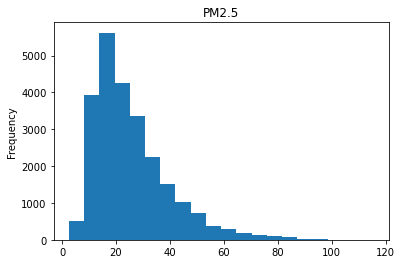

In [15]:
bangkok_df["PM2.5"].plot.hist(bins = 20, title = "PM2.5")

### See bangkok PM2.5 trend 2016-2019

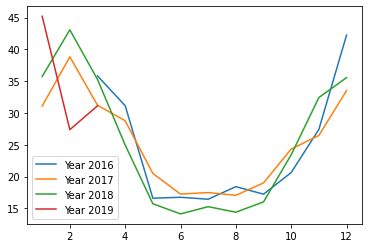

In [44]:
trend_each_year(bangkok_df,"PM2.5")

# Wind
## 1) Bangkok
### 1.1) See information from wind bangkok dataframe

In [30]:
wind_bangkok_df = pd.read_csv("PM2.5_kaggle 2021/Bangkok/Train/3H_wind_Bangkok.csv")
wind_bangkok_df.head(5)

,datetime,WindDir,Wind Speed(km/h),lat,long
0,2016-03-03 01:00:00,45,13,13.754,100.5014
1,2016-03-03 04:00:00,60,11,13.754,100.5014
2,2016-03-03 07:00:00,65,15,13.754,100.5014
3,2016-03-03 10:00:00,75,13,13.754,100.5014
4,2016-03-03 13:00:00,70,12,13.754,100.5014


In [31]:
wind_bangkok_df.describe()

,WindDir,Wind Speed(km/h),lat,long
count,8880.000000,8880.000000,8.880000e+03,8.880000e+03
mean,173.300676,19.887387,1.375400e+01,1.005014e+02
std,93.670420,12.254249,7.532590e-13,1.735243e-11
min,0.000000,0.000000,1.375400e+01,1.005014e+02
25%,80.000000,11.000000,1.375400e+01,1.005014e+02
50%,175.000000,17.000000,1.375400e+01,1.005014e+02
75%,265.000000,26.000000,1.375400e+01,1.005014e+02
max,360.000000,76.000000,1.375400e+01,1.005014e+02


In [32]:
wind_bangkok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          8880 non-null   object 
 1   WindDir           8880 non-null   int64  
 2   Wind Speed(km/h)  8880 non-null   int64  
 3   lat               8880 non-null   float64
 4   long              8880 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 347.0+ KB


### 1.2) Check null value

In [33]:
check_null_all(wind_bangkok_df)

Number of null values in each column:
datetime            0
WindDir             0
Wind Speed(km/h)    0
lat                 0
long                0
dtype: int64


### extract each datetime as columns feature

In [34]:
wind_bangkok_df = extract_date_string(wind_bangkok_df)
# wind_bangkok_df.drop(columns = ["datetime"], inplace = True)
# wind_bangkok_df.rename(columns = {"datetime_tmp":"datetime"} , inplace = True)

### Convert datetime to datetime type

In [35]:
wind_bangkok_df["datetime"] = wind_bangkok_df["datetime"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
wind_bangkok_df

,datetime,WindDir,Wind Speed(km/h),lat,long,Year,Month,Day,UTC Hour
0,2016-03-03 01:00:00,45,13,13.754,100.5014,2016,3,3,1
1,2016-03-03 04:00:00,60,11,13.754,100.5014,2016,3,3,4
2,2016-03-03 07:00:00,65,15,13.754,100.5014,2016,3,3,7
3,2016-03-03 10:00:00,75,13,13.754,100.5014,2016,3,3,10
4,2016-03-03 13:00:00,70,12,13.754,100.5014,2016,3,3,13
...,...,...,...,...,...,...,...,...,...
8875,2019-03-17 10:00:00,110,26,13.754,100.5014,2019,3,17,10
8876,2019-03-17 13:00:00,95,23,13.754,100.5014,2019,3,17,13
8877,2019-03-17 16:00:00,65,15,13.754,100.5014,2019,3,17,16
8878,2019-03-17 19:00:00,70,17,13.754,100.5014,2019,3,17,19


In [36]:
wind_bangkok_df

,datetime,WindDir,Wind Speed(km/h),lat,long,Year,Month,Day,UTC Hour
0,2016-03-03 01:00:00,45,13,13.754,100.5014,2016,3,3,1
1,2016-03-03 04:00:00,60,11,13.754,100.5014,2016,3,3,4
2,2016-03-03 07:00:00,65,15,13.754,100.5014,2016,3,3,7
3,2016-03-03 10:00:00,75,13,13.754,100.5014,2016,3,3,10
4,2016-03-03 13:00:00,70,12,13.754,100.5014,2016,3,3,13
...,...,...,...,...,...,...,...,...,...
8875,2019-03-17 10:00:00,110,26,13.754,100.5014,2019,3,17,10
8876,2019-03-17 13:00:00,95,23,13.754,100.5014,2019,3,17,13
8877,2019-03-17 16:00:00,65,15,13.754,100.5014,2019,3,17,16
8878,2019-03-17 19:00:00,70,17,13.754,100.5014,2019,3,17,19


### 1.3) See trend each attribute

### See bangkok wind trend

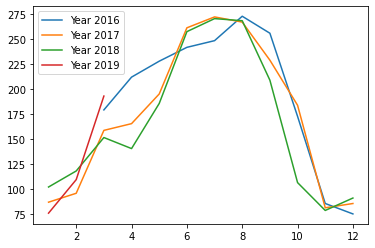

In [45]:
trend_each_year(wind_bangkok_df,"WindDir")

<AxesSubplot:title={'center':'Wind direction bangkok distribution 2016-2019'}, ylabel='Frequency'>

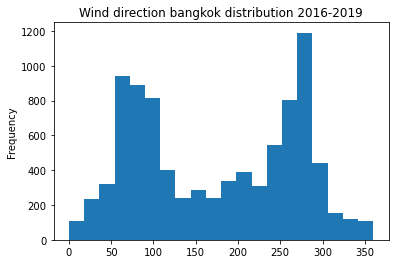

In [37]:
wind_bangkok_df["WindDir"].plot.hist(bins = 20, title = "Wind direction bangkok distribution 2016-2019")

### See bangkok win speed trend

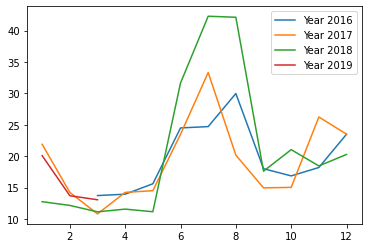

In [46]:
trend_each_year(wind_bangkok_df,"Wind Speed(km/h)")

<AxesSubplot:title={'center':'Wind speed bangkok distribution 2016-2019'}, ylabel='Frequency'>

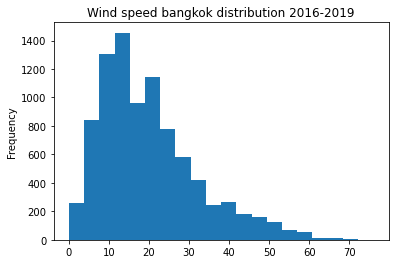

In [47]:
wind_bangkok_df["Wind Speed(km/h)"].plot.hist(bins = 20, title = "Wind speed bangkok distribution 2016-2019")

# Temperature

In [56]:
temp_bangkok_df = pd.read_csv("PM2.5_kaggle 2021/Bangkok/Train/3H_temperature_Bangkok.csv")

In [57]:
temp_bangkok_df.head()

,datetime,Temp(C),lat,long
0,2016-03-03 01:00:00,25.5,13.754,100.5014
1,2016-03-03 04:00:00,25.0,13.754,100.5014
2,2016-03-03 07:00:00,26.4,13.754,100.5014
3,2016-03-03 10:00:00,31.4,13.754,100.5014
4,2016-03-03 13:00:00,34.1,13.754,100.5014


In [58]:
temp_bangkok_df.describe()

,Temp(C),lat,long
count,8880.000000,8.880000e+03,8.880000e+03
mean,29.584167,1.375400e+01,1.005014e+02
std,2.835496,7.549942e-13,1.735243e-11
min,17.200000,1.375400e+01,1.005014e+02
25%,27.600000,1.375400e+01,1.005014e+02
50%,29.300000,1.375400e+01,1.005014e+02
75%,31.500000,1.375400e+01,1.005014e+02
max,38.500000,1.375400e+01,1.005014e+02


In [59]:
temp_bangkok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  8880 non-null   object 
 1   Temp(C)   8880 non-null   float64
 2   lat       8880 non-null   float64
 3   long      8880 non-null   float64
dtypes: float64(3), object(1)
memory usage: 277.6+ KB


### Check null value

In [60]:
check_null_all(temp_bangkok_df)

Number of null values in each column:
datetime    0
Temp(C)     0
lat         0
long        0
dtype: int64


In [61]:
temp_bangkok_df = extract_date_string(temp_bangkok_df)
temp_bangkok_df["datetime"] = temp_bangkok_df["datetime"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
temp_bangkok_df

,datetime,Temp(C),lat,long,Year,Month,Day,UTC Hour
0,2016-03-03 01:00:00,25.5,13.754,100.5014,2016,3,3,1
1,2016-03-03 04:00:00,25.0,13.754,100.5014,2016,3,3,4
2,2016-03-03 07:00:00,26.4,13.754,100.5014,2016,3,3,7
3,2016-03-03 10:00:00,31.4,13.754,100.5014,2016,3,3,10
4,2016-03-03 13:00:00,34.1,13.754,100.5014,2016,3,3,13
...,...,...,...,...,...,...,...,...
8875,2019-03-17 10:00:00,32.1,13.754,100.5014,2019,3,17,10
8876,2019-03-17 13:00:00,33.4,13.754,100.5014,2019,3,17,13
8877,2019-03-17 16:00:00,34.6,13.754,100.5014,2019,3,17,16
8878,2019-03-17 19:00:00,31.3,13.754,100.5014,2019,3,17,19


In [24]:
a = df["Year"].unique()

In [25]:
for i in a:
    print(i)

2016
2017
2018
2019


In [30]:
result = bangkok_df.groupby('Year').agg({'Month': ['min','max']})

In [46]:
a = result.to_dict()

In [51]:
a[('Month', 'min')][2016]

3

In [27]:
df = bangkok_df
df[df["Year"] == 2016].groupby(["Month"]).mean()

,Year,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
Month,,,,,,
3,2016.0,17.115214,11.664697,35.833235,0.995569,0.0
4,2016.0,15.505666,11.511331,31.155382,0.994334,0.0
5,2016.0,15.925272,11.410326,16.606114,0.966033,0.0
6,2016.0,16.402421,11.599092,16.755068,0.889561,0.0
7,2016.0,16.057931,11.532414,16.444552,0.972414,0.0
8,2016.0,16.006916,11.475795,18.425864,0.965422,0.0
9,2016.0,15.601770,11.546903,17.239823,1.000000,0.0
10,2016.0,15.904830,11.572443,20.642045,0.920455,0.0
11,2016.0,15.706587,11.464072,27.425449,0.919162,0.0


In [178]:
info_df.to_csv("df_info.csv", index = False, encoding = "UTF-8")

In [180]:
test_info_df = pd.read_csv("df_info.csv")
test_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         1 non-null      object 
 1   City            1 non-null      object 
 2   City (ASCII)    1 non-null      object 
 3   Region          1 non-null      object 
 4   Region (ASCII)  1 non-null      object 
 5   Population      1 non-null      int64  
 6   Latitude        1 non-null      float64
 7   Longitude       1 non-null      float64
 8   Time Zone       1 non-null      object 
dtypes: float64(2), int64(1), object(6)
memory usage: 200.0+ bytes


In [132]:
line = info[0]
line.split(":")
a = [[1,2],[3,4],[5,6]]
b = {k:v for t in a for k,v in t}

TypeError: cannot unpack non-iterable int object

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386 entries, 0 to 24385
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           24386 non-null  object
 1   Month          24386 non-null  object
 2   Day            24386 non-null  object
 3   UTC Hour       24386 non-null  object
 4   PM2.5          24386 non-null  object
 5   PM10_mask      24386 non-null  object
 6   Retrospective  24386 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


In [105]:
pd.to_datetime(df[['Year', 'Month', 'Day','UTC Hour']])

ValueError: extra keys have been passed to the datetime assemblage: [UTC Hour]

In [111]:
pd.to_datetime(dict(year = df.Year, month =df.Month, day = df.Day, hour = df["UTC Hour"]))

0       2016-03-03 08:00:00
1       2016-03-03 09:00:00
2       2016-03-03 10:00:00
3       2016-03-03 11:00:00
4       2016-03-03 12:00:00
                ...        
24381   2019-03-17 19:00:00
24382   2019-03-17 20:00:00
24383   2019-03-17 21:00:00
24384   2019-03-17 22:00:00
24385   2019-03-17 23:00:00
Length: 24386, dtype: datetime64[ns]

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
24381    2019
24382    2019
24383    2019
24384    2019
24385    2019
Name: Year, Length: 24386, dtype: object

In [71]:

info,columns,data = pm_data(cities[3])
# i = 0

# for d in data:
#     if  i == 10:
#         break
#     #d = d.split("\t")
#     d[3] = int(d[3])+7
#     print(d)
#     i+=1

# i=0
# print("\n")
# while(i<10):
#     print(data[i])
#     i+=1

In [53]:
data[0]

'2016\t3\t3\t8\t44.2\t1.00\t0'